## Importing Libraries ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics

**EDA**

In [2]:
#loading the data into pandas
url = "https://raw.githubusercontent.com/StephenJudeD/IMDB-Top-100-Movies/main/imdb_top_1000.csv"
#df = pd.read_csv(url,index_col=7)
df = pd.read_csv(url)

print(df.head(5))


                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df
# loading the dataset

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [5]:
df.drop(columns=['Poster_Link'],axis=1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [6]:
df.shape
# the dataset has around 5043 rows and 28 columns

(1000, 16)

In [7]:
df.info()
# Checking the information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
df.isnull().sum()
# There are null values present in this dataset which have to be imputed.

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
df.columns
# Displaying all the column names present in the dataframe.

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [10]:
df['Genre'].value_counts()
# Drama being most prominent, and mixed with other genres

Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
                                ..
Drama, Horror, Mystery           1
Film-Noir, Mystery, Thriller     1
Family, Sci-Fi                   1
Adventure, Drama, Musical        1
Film-Noir, Mystery               1
Name: Genre, Length: 202, dtype: int64

In [11]:
df.describe()
# Using the describe function to check the min, max values as well as mean and standard deviation.

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [12]:
df.nunique()
# Displays the total number of variables present in the data frames columns

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
Genre             202
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
dtype: int64

In [13]:
df['Director'].value_counts()
# Alfred Hitchcock 14/1000

Alfred Hitchcock        14
Steven Spielberg        13
Hayao Miyazaki          11
Martin Scorsese         10
Akira Kurosawa          10
                        ..
Paul King                1
Felix van Groeningen     1
John G. Avildsen         1
Anurag Basu              1
Louis Malle              1
Name: Director, Length: 548, dtype: int64

In [14]:
df['Star1'].value_counts()
# Tom Hanks top Star 12/1000

Tom Hanks              12
Robert De Niro         11
Al Pacino              10
Clint Eastwood         10
Humphrey Bogart         9
                       ..
Natalya Bondarchuk      1
Golshifteh Farahani     1
Kevin McCarthy          1
Jason London            1
Vidya Balan             1
Name: Star1, Length: 660, dtype: int64

## Data visualization

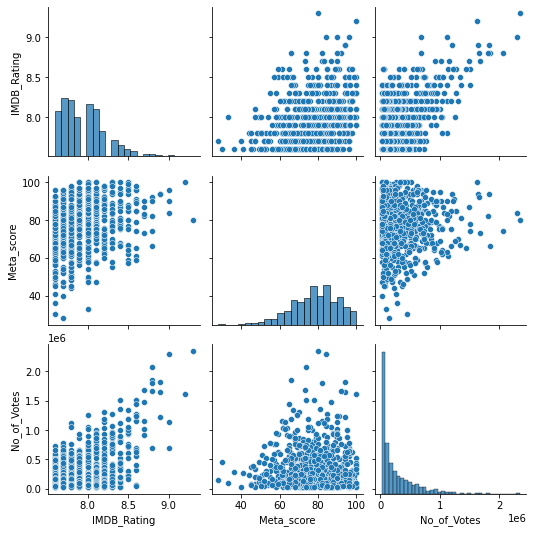

In [15]:
sns.pairplot(data=df)

<AxesSubplot:ylabel='IMDB_Rating'>

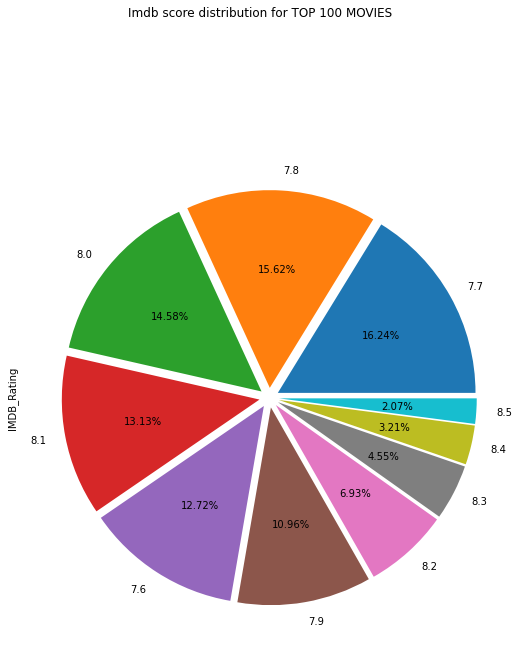

In [16]:
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Imdb score distribution for TOP 100 MOVIES")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
df['IMDB_Rating'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
# Pie plot for top 10 Imdb_scores.
# Around 11.74 percent of the data has a imdb_score which is 6.7

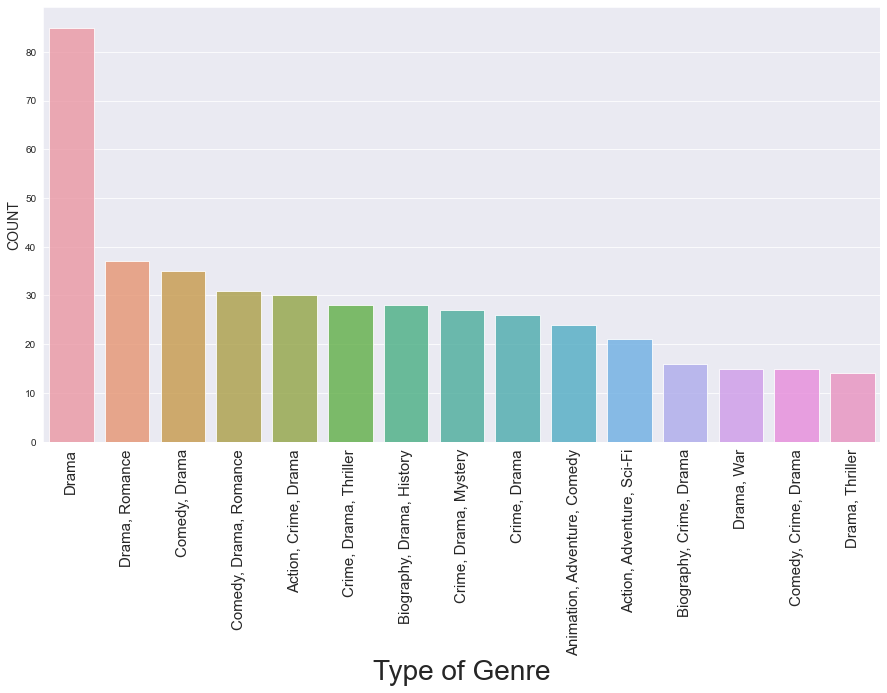

In [17]:
sns.set_style("darkgrid")
ls=df['Genre'].value_counts().head(15).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Type of Genre', fontsize=28)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=15)
plt.show()
# Visualizing the count of Genres in the dataset.

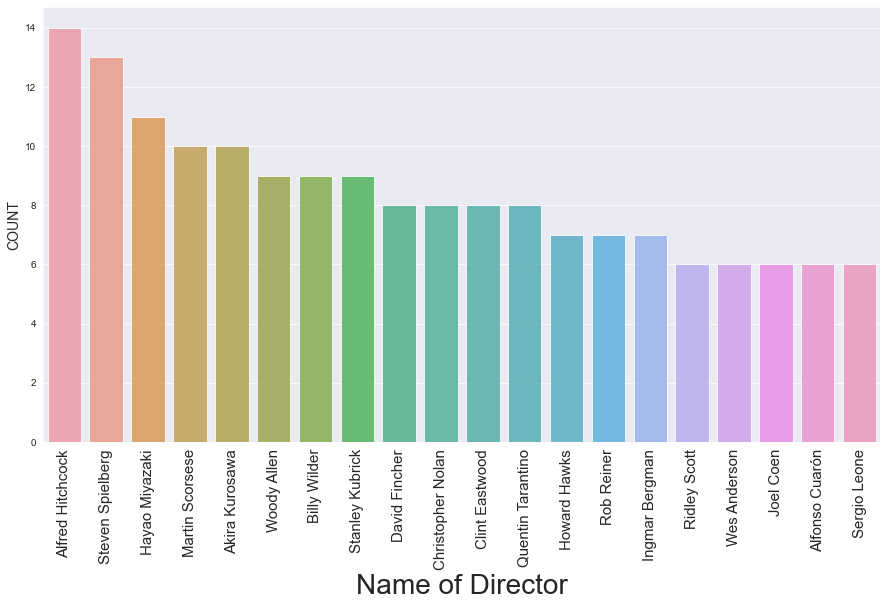

In [18]:
sns.set_style("darkgrid")
ls=df['Director'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Name of Director', fontsize=28)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=15)
plt.show()
# Visualizing the Directors names present in the dataset.

In [19]:
df.isnull().sum()
# As you can see there is no null values present in the dataset now.

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.shape

(714, 16)

In [22]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [23]:
df2=df.drop(columns=['Poster_Link','Series_Title','Certificate','Overview',
                    'Star4'])

In [24]:
df2

,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,No_of_Votes,Gross
0,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,2343110,"28,341,469"
1,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,1620367,"134,966,411"
2,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,2303232,"534,858,444"
3,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,1129952,"57,300,000"
4,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...
990,1971,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,30144,"696,690"
991,1970,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,45338,"1,378,435"
992,1967,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,166409,"141,843,612"
994,1964,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,40351,"13,780,024"


In [25]:
df.shape
# The number of columns have now been reduced to 20 

(714, 16)

In [26]:
df2.dtypes

Released_Year     object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
No_of_Votes        int64
Gross             object
dtype: object

## Label Encoding Categorical data

In [27]:
cat_cols=['Released_Year','Runtime','Genre','Director','Star1','Star2','Star3','Gross']
le=LabelEncoder()
for i in cat_cols:
    df2[i]=le.fit_transform(df[i])
df2.dtypes
## We have label encoded the categorical columns in the dataset and transformed them to numeric values.

Released_Year      int32
Runtime            int32
Genre              int32
IMDB_Rating      float64
Meta_score       float64
Director           int32
Star1              int32
Star2              int32
Star3              int32
No_of_Votes        int64
Gross              int32
dtype: object

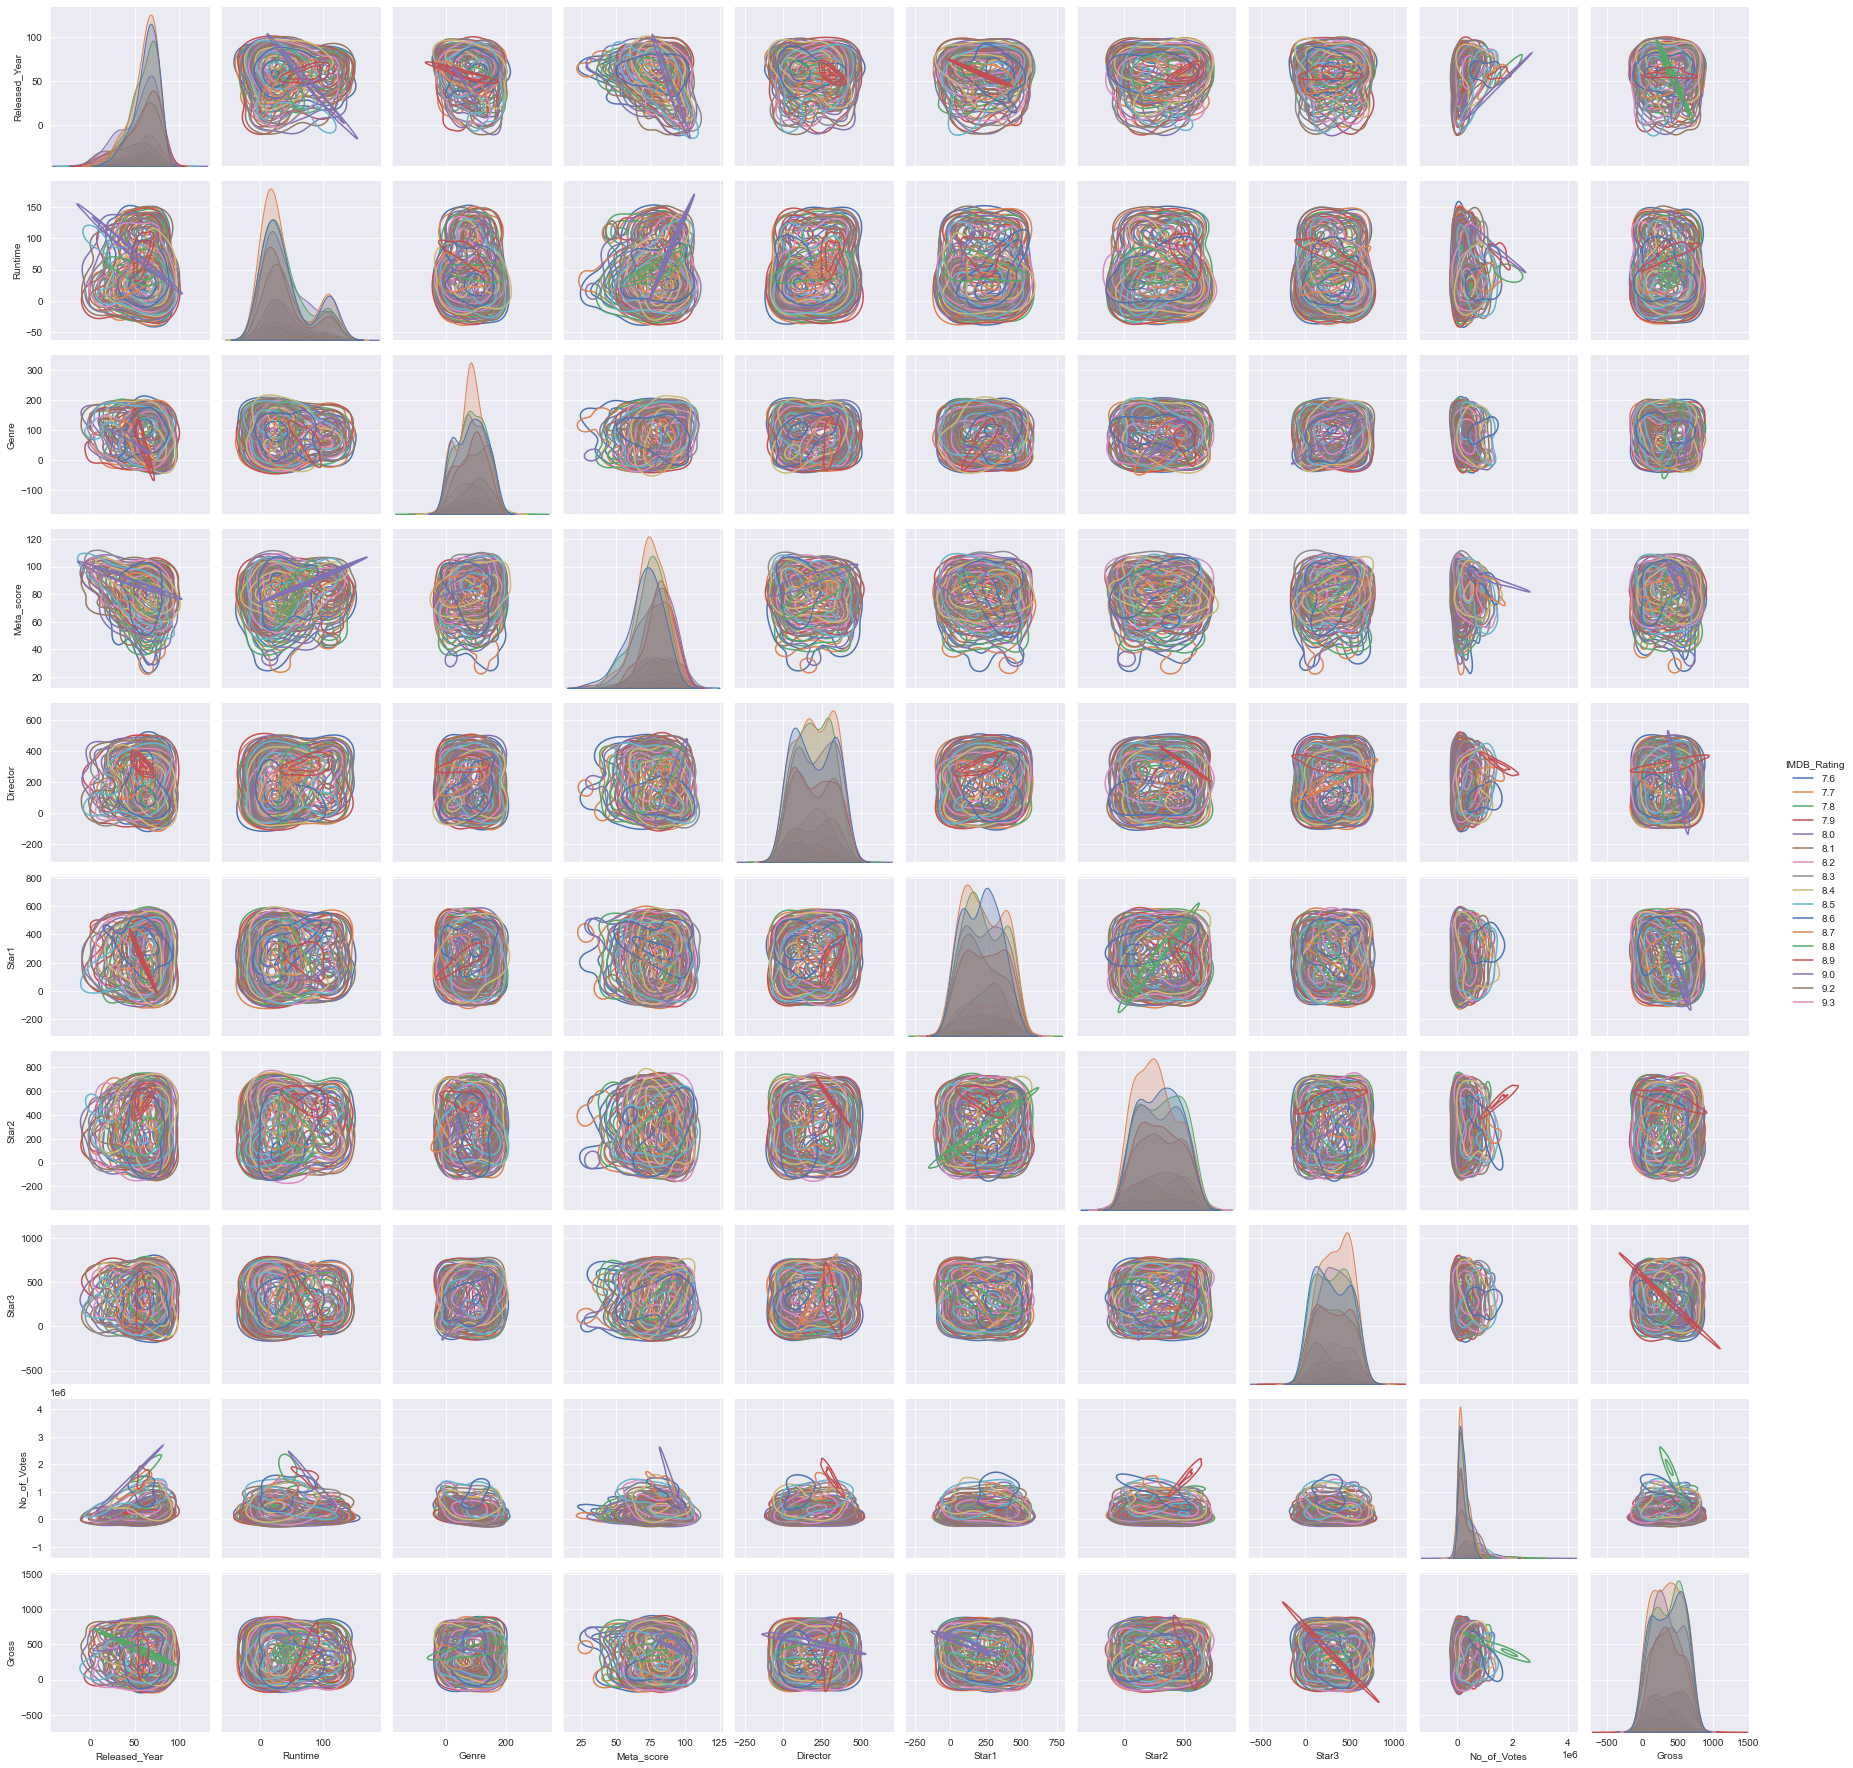

In [28]:
sns.pairplot(df2, kind="kde", hue="IMDB_Rating", palette = "deep")

# Log Transformation 

In [29]:
df2.columns                       
# Displaying all column names,copypaste this in the next cell.

Index(['Released_Year', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score',
       'Director', 'Star1', 'Star2', 'Star3', 'No_of_Votes', 'Gross'],
      dtype='object')

In [30]:
skewed_features=['Released_Year', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score',
       'Director', 'Star1', 'Star2', 'Star3', 'No_of_Votes', 'Gross'] 
# Selecting all features which are skewed and storing them i n the skewed_features

In [31]:
for i in skewed_features:
    df2[i]=np.log(df2[i]+1)
# Applying log transformation on the skewed features    

## Splitting dataset

In [32]:
X=df2.drop(labels=['IMDB_Rating'],axis=1)
Y=df2['IMDB_Rating']
X.head()
# splitting data into dependent and independent variables

,Released_Year,Runtime,Genre,Meta_score,Director,Star1,Star2,Star3,No_of_Votes,Gross
0,4.043051,3.761200,4.770685,4.394449,4.644391,6.075346,6.003887,4.094345,14.666990,5.808142
1,3.555348,4.290459,4.663439,4.615121,4.615121,5.723585,1.609438,5.476464,14.298164,4.828314
2,4.262680,3.970292,2.890372,4.442651,4.094345,4.499810,5.278115,0.000000,14.649824,6.318968
3,3.610918,4.488636,4.663439,4.510860,4.615121,1.791759,6.137727,6.210600,13.937687,6.357842
4,2.995732,4.744932,4.663439,4.574711,5.826000,5.220356,5.793014,5.950643,13.444224,6.102559


In [33]:
Y.head()
# target column

0    2.332144
1    2.322388
2    2.302585
3    2.302585
4    2.302585
Name: IMDB_Rating, dtype: float64

In [34]:
# Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# Splitting data set into training and testing.

(571, 10) (143, 10) (571,) (143,)


# Machine Learning

### Linear Regression

In [35]:
lm=LinearRegression()   
lm = lm.fit(X_train,Y_train)

#Traindata Predictions
train_pred = lm.predict(X_train)

#testdata predictions
test_pred = lm.predict(X_test)


RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  0.025555407861301175
RMSE TestData =  0.02660132134773863
--------------------------------------------------
RSquared value on train: 0.37226988088516033
RSquared value on test: 0.3055050520571875


In [36]:
errors = abs(test_pred - Y_test)
# Calculating errors for using error values in mean absolute percentage error

In [37]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.05 %.


### Decision Tree Regressor

In [38]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.012082696871606761
RMSE TestData =  0.028764979777665997
--------------------------------------------------
RSquared value on train: 0.8596749860683081
RSquared value on test: 0.18793495322566323


In [39]:
errors = abs(test_preds - Y_test)
# Calculating errors for using error values in mean absolute percentage error

In [40]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.99 %.


### Random Forest Regressor

In [41]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.008336061684220132
RMSE TestData =  0.0224070597106882
--------------------------------------------------
RSquared value on train: 0.9332072733284072
RSquared value on test: 0.5072434400160988


In [42]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error

In [43]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.19 %.


### K-Nearest Neighbours

In [44]:
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)

#predicting train
train_preds2=knn.predict(X_train)
#predicting on test
test_preds2=knn.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds2)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',knn.score(X_train, Y_train))
print('RSquared value on test:',knn.score(X_test, Y_test))

RMSE TrainingData =  0.022651713318891254
RMSE TestData =  0.027661018858893056
--------------------------------------------------
RSquared value on train: 0.5068154683386763
RSquared value on test: 0.2490707568028071


In [45]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error

In [46]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.19 %.


**More machine learning algorithms**

In [47]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor

### XG-Boost Regressor

In [48]:
xgbr =xgb.XGBRegressor().fit(X_train, Y_train)
#predicting train
train_preds6=xgbr.predict(X_train)
#predicting on test
test_preds6=xgbr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',xgbr.score(X_train, Y_train))
print('RSquared value on test:',xgbr.score(X_test, Y_test))

RMSE TrainingData =  0.0011045123141515854
RMSE TestData =  0.021915309437043857
--------------------------------------------------
RSquared value on train: 0.9988274038657755
RSquared value on test: 0.528634398681733


In [49]:
errors = abs(test_preds6 - Y_test)
# Calculating errors for using error values in mean absolute percentage error

In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.21 %.


In [51]:
# All algos are accurate based on parameters, although it must be said that the data is very linear and easy